## What is Customer Churn?
 - Customer churn is defined as when customers or subscribers discontinue using sevices of firm
### what is Telcom Customer Churn ?
 - Customers in telecmunication can switch to one Service privider to another this can cause the telcom cutomer churn
   
  - #### Common Causes of Telecom Churn :
     - Poor Network Quality (dropped calls, slow internet)
     - High Pricing (competitors offering better deals)
     - Poor Customer Service (unresolved complaints)
     - Lack of Personalization (customers feel undervalued)
     - Billing Issues (hidden charges, incorrect bills)
     - 
  

Here Telcom Customer Churn dataset is got from Kaggle

## 2. Loading Libraries and Data

In [274]:
import pandas as pd

import numpy as np


In [275]:
tel=pd.read_csv('Telco-Customer-Churn.csv')

In [276]:
tel.shape

(7043, 21)

In [277]:
tel.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [278]:
tel[tel['Churn']=='Yes'].shape

(1869, 21)

#### This data set is about 7043 cutomer records out of then 1869 Cutomers are  Churn 

# 3. Columns Discription

In [279]:
tel.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- <strong>Info about Customer realated columns :</strong> gender,CutomerID,Partner-marride,Dependent-having childerns or finnacially dependent on him someone like elderfather/eldermother,SeniorCitizen(age range)
- <strong>Services that each customer has signed up for columns :</strong> 'PhoneService', 'MultipleLines'-The same customer is using the telecom service for more than one phone number or device under a single accoun, 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
- <strong>Customers who left within the last month : </strong> The Column called churn
- <strong>Customer account information : </strong> 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',tenure (no of month they are taking services)

In [280]:
# lets see random 5 records of cutomer
tel.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6799,8071-SBTRN,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Mailed check,111.15,7737.55,No
1575,2003-CKLOR,Male,0,No,No,66,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.50,6710.5,Yes
3001,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No
3271,3902-FOIGH,Male,1,Yes,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.35,1218.55,Yes
3286,3318-OSATS,Male,1,No,No,35,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,3474.05,Yes


In [281]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Columns Type
 - __Numerical Type:__ tenure,Monthlycharges,TotalCharges.
 - __Categorical:__ gender,SeniorCitizen,partner,Dependents,'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
       'StreamingMovies',contract,PaperlessBilling,PaymentMethod,Churn
       
 - __Mixed:__ customerID

In [282]:
tel['TotalCharges']=pd.to_numeric(tel['TotalCharges'],errors='coerce')
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<!-- ### wrong Format
 - here we can see that a SeniorCitizen column should be in yes no format but it represented as 0 and 1
 - here TotalCharges columns shoulbe in numerical format
 -  -->



In [283]:
temp=tel.copy()

In [284]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [285]:
tel.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [286]:
# calculate how much percatge of values missing in column 
tel['TotalCharges'].isnull().mean()*100

np.float64(0.1561834445548772)

In [287]:
tel.dropna(inplace=True)
# here only 0.15% values are missing thats why droped that columns

In [288]:
tel.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA/Data Visulization

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

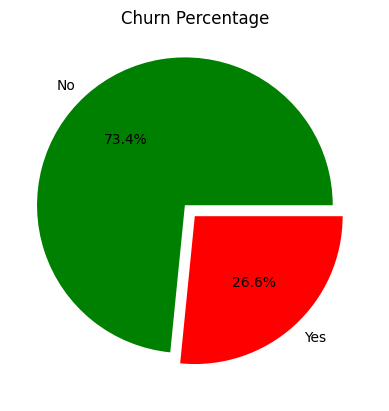

In [290]:
plt.pie(tel['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',colors=['green','red'],explode=[0.1, 0])
plt.title("Churn Percentage")
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

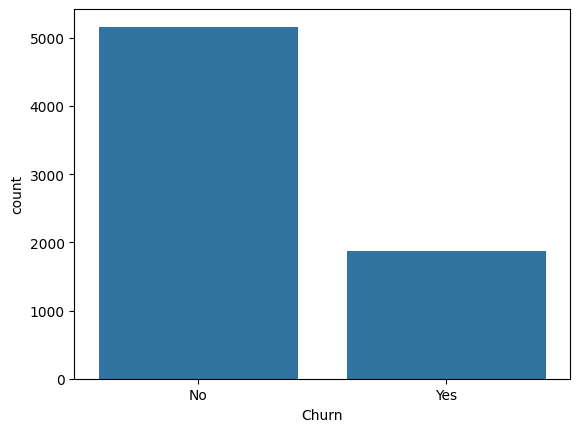

In [291]:
sns.countplot(data=tel,x='Churn')

In [292]:
tel.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3031,3923-CSIHK,Female,1,Yes,No,50,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71.05,3444.85,Yes


<Axes: >

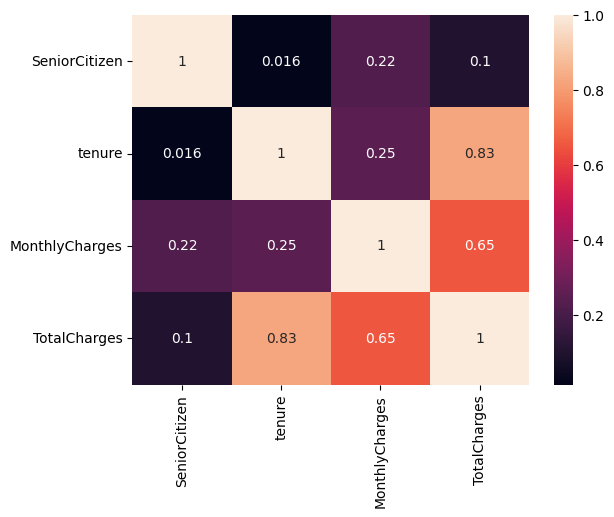

In [293]:
ht=tel.select_dtypes(include=['number']).corr()
sns.heatmap(ht,annot=True)

In [294]:
tel.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8104\236440407.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


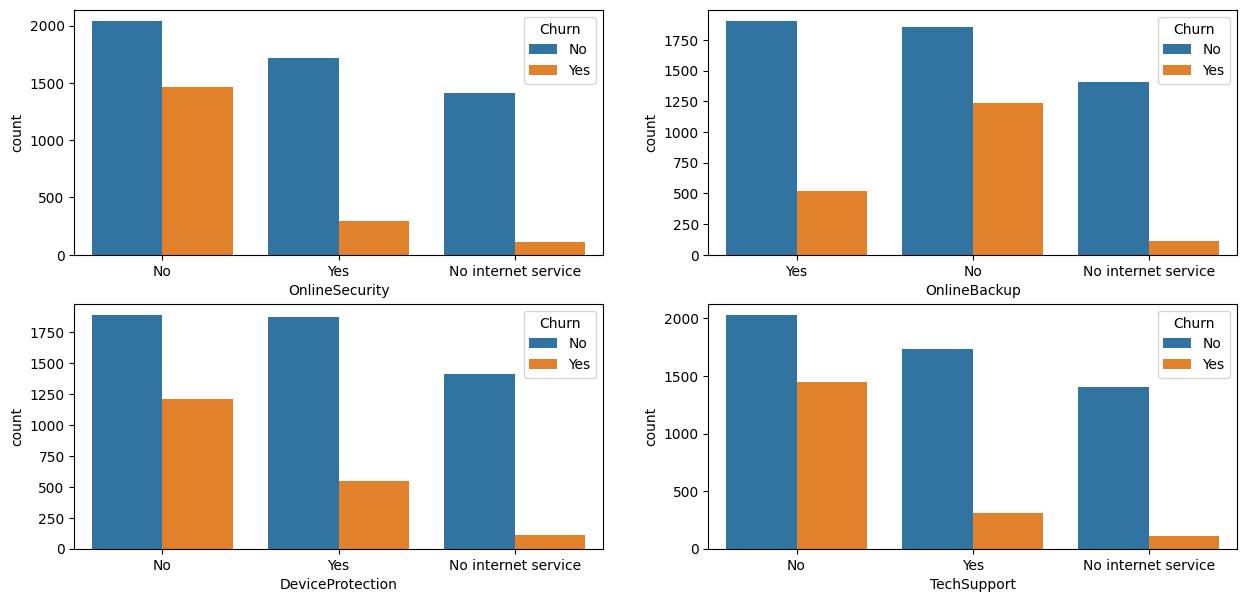

In [295]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,7))

sns.countplot(data=tel,x='OnlineSecurity',hue='Churn',ax=ax[0,0])
sns.countplot(data=tel,x='OnlineBackup',hue='Churn',ax=ax[0,1])
sns.countplot(data=tel,x='DeviceProtection',hue='Churn',ax=ax[1,0])
sns.countplot(data=tel,x='TechSupport',hue='Churn',ax=ax[1,1])
fig.show()


<Axes: xlabel='Dependents', ylabel='count'>

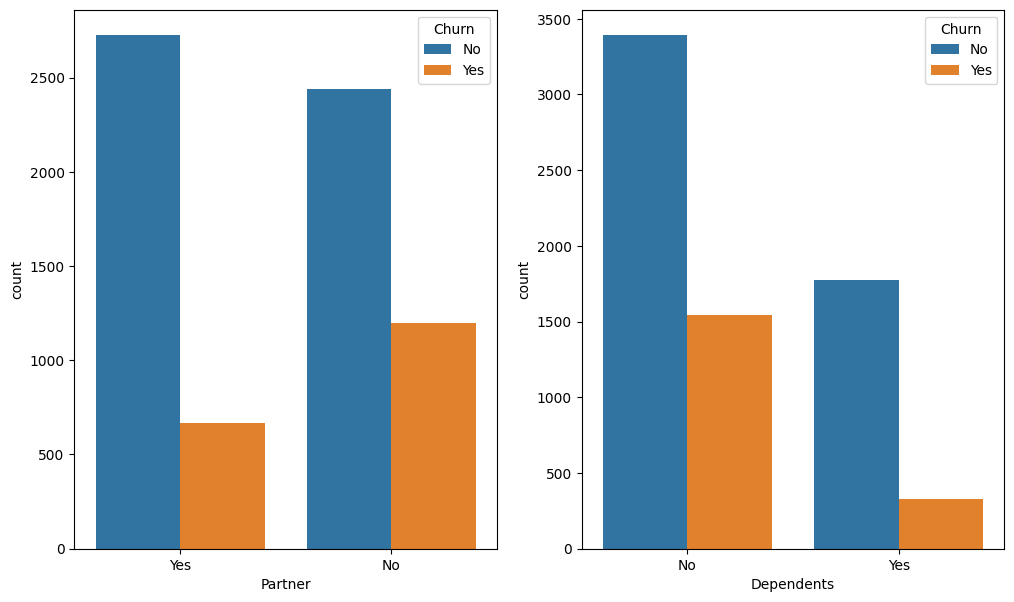

In [296]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,7))

sns.countplot(data=tel,x='Partner',hue='Churn',ax=ax[0])
sns.countplot(data=tel,x='Dependents',hue='Churn',ax=ax[1])


<Axes: xlabel='MultipleLines', ylabel='count'>

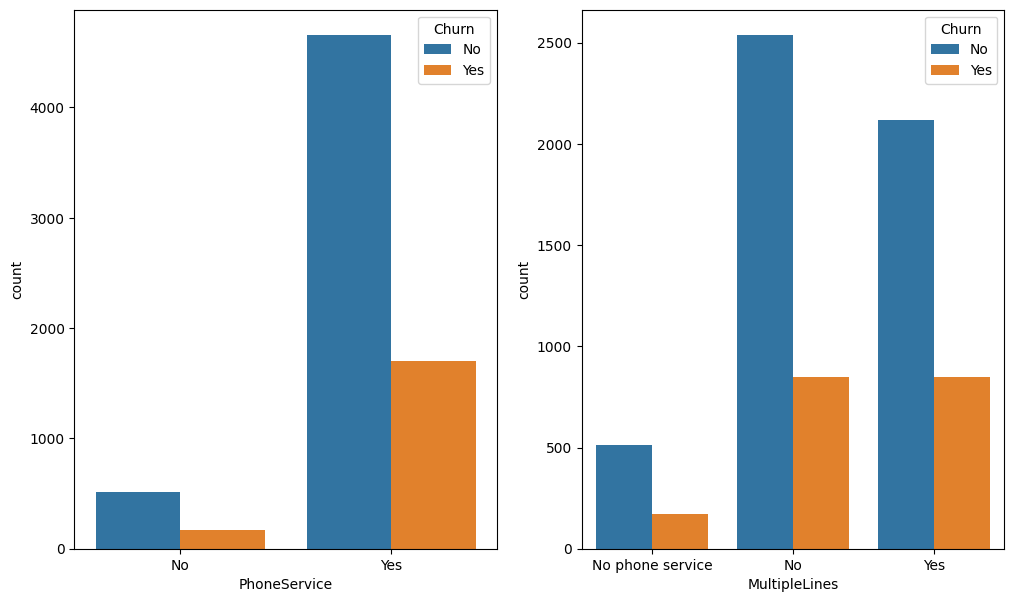

In [297]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,7))

sns.countplot(data=tel,x='PhoneService',hue='Churn',ax=ax[0])
sns.countplot(data=tel,x='MultipleLines',hue='Churn',ax=ax[1])

# here we can see that multiple lines and phone service are corelated with each other 
# in multipleline no means atleast one phone line service is using, in  multiple line yes means multiple phone line are using  in multipleline no phone service means no  phone service is using 
# so that we can see here who using alteast one phone service are more likely to leave we can say there is some problem with phone line service

In [298]:
tel.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Churn Based on Contract Type')

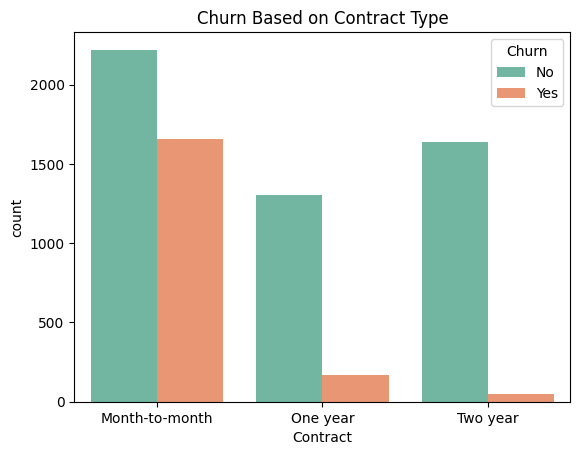

In [299]:
sns.countplot(data=tel,x='Contract',hue='Churn',palette="Set2")
plt.title('Churn Based on Contract Type')

<Axes: xlabel='TotalCharges', ylabel='Density'>

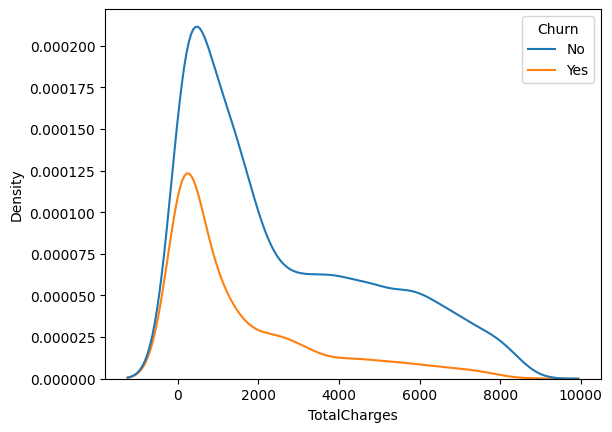

In [300]:
sns.kdeplot(data=tel,x='TotalCharges',hue='Churn')
# sns.histplot(data=tel,x='TotalCharges',hue='Churn')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

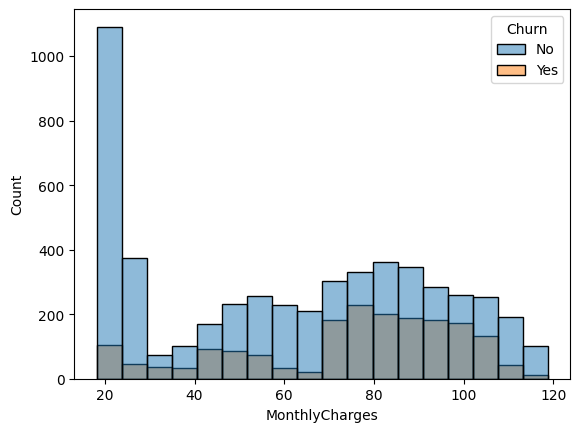

In [301]:
sns.histplot(data=tel,x=tel['MonthlyCharges'],hue='Churn')


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

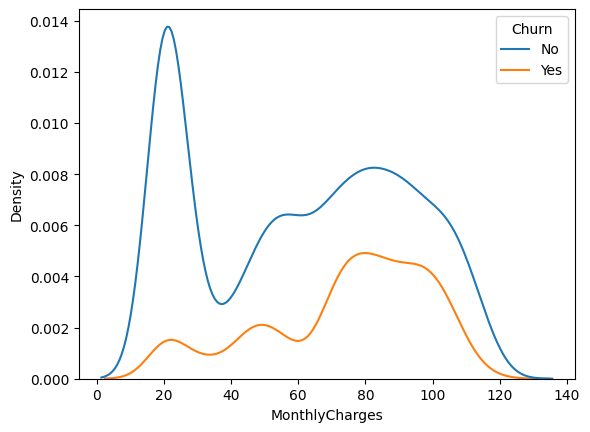

In [302]:
sns.kdeplot(data=tel,x=tel['MonthlyCharges'],hue='Churn')

In [303]:
tel.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6376,1302-TPUBN,Male,0,No,No,66,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.35,1240.8,No


<Axes: xlabel='InternetService', ylabel='count'>

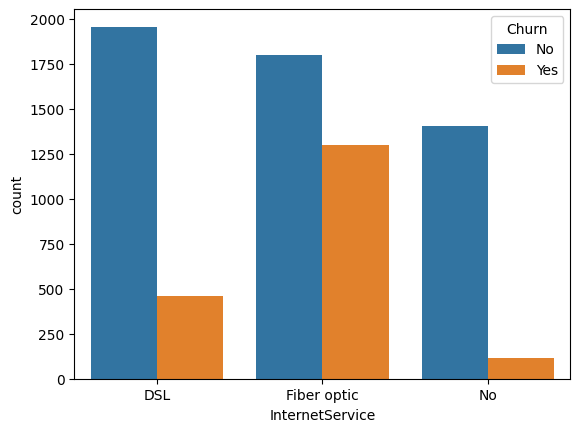

In [304]:
sns.countplot(data=tel,x=tel['InternetService'],hue='Churn')

<Axes: xlabel='PaperlessBilling', ylabel='count'>

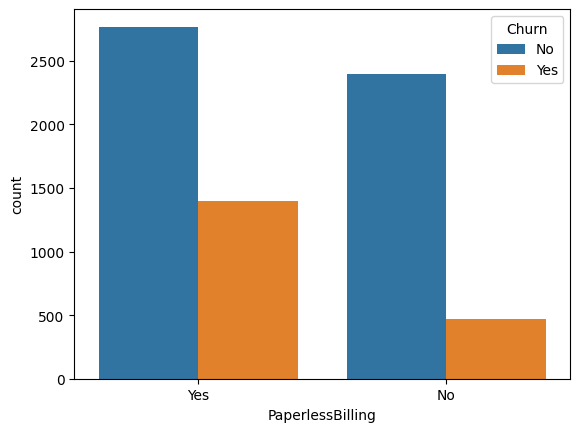

In [305]:
sns.countplot(data=tel,x=tel['PaperlessBilling'],hue=tel['Churn'])

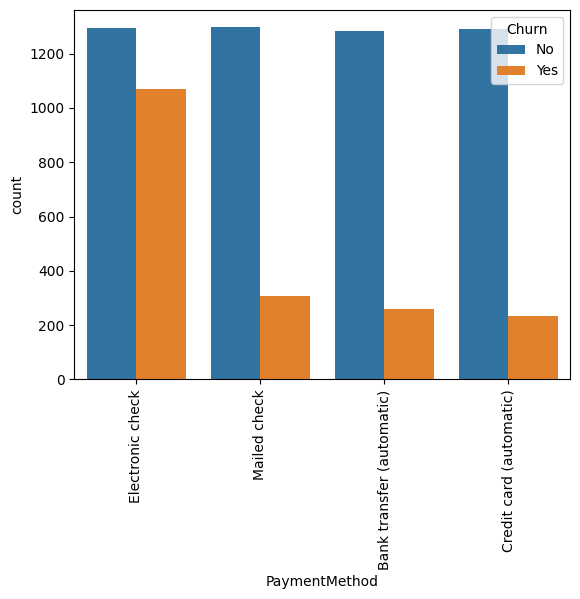

In [306]:
sns.countplot(data=tel,x=tel['PaymentMethod'],hue=tel['Churn'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='tenure', ylabel='Density'>

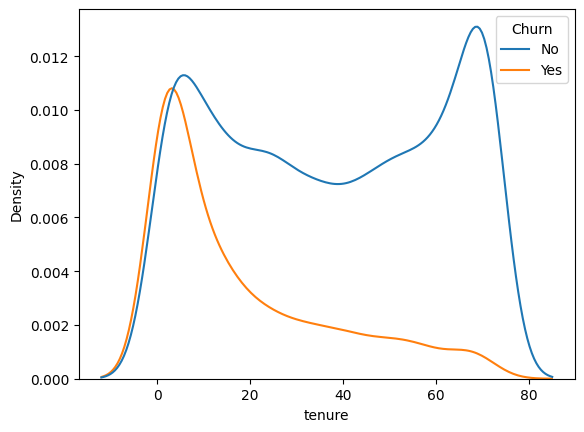

In [307]:
sns.kdeplot(data=tel,x=tel['tenure'],hue=tel['Churn'])

# Feature Selection

In [308]:
df=tel.drop(columns=['customerID','gender','tenure','OnlineBackup','OnlineSecurity','StreamingMovies','StreamingTV','MonthlyCharges','PhoneService'])

In [309]:
tel.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [310]:
df

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,No phone service,DSL,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,No,DSL,Yes,No,One year,No,Mailed check,1889.50,No
2,0,No,No,No,DSL,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,No phone service,DSL,Yes,Yes,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,DSL,Yes,Yes,One year,Yes,Mailed check,1990.50,No
7039,0,Yes,Yes,Yes,Fiber optic,Yes,No,One year,Yes,Credit card (automatic),7362.90,No
7040,0,Yes,Yes,No phone service,DSL,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,1,Yes,No,Yes,Fiber optic,No,No,Month-to-month,Yes,Mailed check,306.60,Yes


In [311]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [312]:
for i in df:
    print(i,df[i].nunique())
    print()

SeniorCitizen 2

Partner 2

Dependents 2

MultipleLines 3

InternetService 3

DeviceProtection 3

TechSupport 3

Contract 3

PaperlessBilling 2

PaymentMethod 4

TotalCharges 6530

Churn 2



In [313]:
for i in df[['Partner','Dependents','PaperlessBilling']]:
    df[i]=df[i].map({'Yes':1,'No':0})


In [314]:
df.sample()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
6407,0,0,0,No,DSL,No,No,One year,0,Mailed check,931.9,No


In [315]:
lb=LabelEncoder()
df['Churn']=lb.fit_transform(df['Churn'])

In [316]:
df.sample()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
3988,0,0,0,Yes,DSL,Yes,Yes,One year,1,Credit card (automatic),4126.2,0


In [317]:
sc=StandardScaler()
# df['TotalCharges']=sc.fit_transform(pd.DataFrame(df['TotalCharges']))
df['TotalCharges']=tel['TotalCharges']

In [318]:
df.sample()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
6333,1,0,0,Yes,Fiber optic,Yes,Yes,One year,1,Electronic check,6441.4,1


In [319]:
ohe=OneHotEncoder(sparse_output=False)
df_ohe=ohe.fit_transform(df[['MultipleLines','InternetService','DeviceProtection','TechSupport','Contract','PaymentMethod']])
columns=ohe.get_feature_names_out(['MultipleLines','InternetService','DeviceProtection','TechSupport','Contract','PaymentMethod'])
df_ohe=pd.DataFrame(df_ohe,columns=columns)

In [320]:
df_ohe=df_ohe.drop(columns=['DeviceProtection_No internet service','TechSupport_No internet service'])
df_ohe.sample()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4256,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [321]:
df=df.drop(columns=['MultipleLines','InternetService','DeviceProtection','TechSupport','Contract','PaymentMethod'])

In [322]:
df_ohe.isnull().sum(),df.isnull().sum()
df_ohe.shape,df.shape

((7032, 17), (7032, 6))


# Safer Side

In [323]:
temp=df


In [324]:
df1 = pd.DataFrame({'A': [1, 2, 3]}, index=[0, 1, 2])
df2 = pd.DataFrame({'B': ['x', 'y', 'z']}, index=[10, 11, 12])
df1

# This will cause NaN because indices don't match
# wrong_concat = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
# wrong_concat


,A
0,1
1,2
2,3


In [325]:
df=pd.concat([df.reset_index(drop=True),df_ohe.reset_index(drop=True)],axis=1)
df.isnull().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PaperlessBilling                           0
TotalCharges                               0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
DeviceProtection_No                        0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_Yes                            0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMet

In [326]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [327]:
tel['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [328]:
df.sample()
df.shape

(7032, 23)

# Model_Selection

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
x=df.drop(columns='Churn')
y=df['Churn']

In [363]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y, 
                                                    random_state=42)

In [364]:
x_train.shape,y_train.shape

((5625, 22), (5625,))

In [365]:
x_test.shape,y_test.shape

((1407, 22), (1407,))

In [403]:
from imblearn.combine import SMOTEENN


In [404]:
sm=SMOTEENN(random_state=42)

In [405]:
x_resample,y_resample=sm.fit_resample(x_train,y_train)

In [406]:
x_resample.shape

(4121, 22)

In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [408]:
lr=LogisticRegression( max_iter=1000)
lr.fit(x_resample,y_resample)

LogisticRegression(max_iter=1000)

In [409]:
y_pred=lr.predict(x_test)


In [411]:
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7085998578535891
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407



# Desion Tree

In [412]:
from sklearn.tree import DecisionTreeClassifier

In [413]:
ds=DecisionTreeClassifier(random_state=42)

In [414]:
ds.fit(x_resample,y_resample)

DecisionTreeClassifier(random_state=42)

In [415]:
y_pred=ds.predict(x_test)

In [417]:
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7263681592039801
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1033
           1       0.49      0.70      0.58       374

    accuracy                           0.73      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.73      0.74      1407



# Random Forest

In [379]:
from sklearn.ensemble import RandomForestClassifier


In [421]:

rf = RandomForestClassifier(n_estimators=100, 
                                criterion='gini', 
                                  random_state=42,max_depth=6,min_samples_leaf=8)
rf.fit(x_resample, y_resample)

# 6. Make Predictions
y_pred = rf.predict(x_test)

# 7. Evaluation
print(rf.score(x_test,y_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


0.7071783937455579
Accuracy: 0.7071783937455579
Confusion Matrix:
 [[702 331]
 [ 81 293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407



# XG  Boost

In [397]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=(len(y_resample[y_resample == 0]) / 
                                            len(y_resample[y_resample == 1])),
                          eval_metric='logloss', 
                          use_label_encoder=False,
                          random_state=42)

xgb_model.fit(x_resample, y_resample)
y_pred_xgb = xgb_model.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred))


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:34:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.57      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.78      1407

Accuracy: 0.7590618336886994


In [398]:
from sklearn.metrics import roc_auc_score

print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))

ROC-AUC Score: 0.7945977915939764


In [401]:
import joblib
joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']

In [402]:
x_resample.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'TotalCharges', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')